In [1]:
"""
This custom code is designed to compare the output with a Scikit-Learn model, specifically focusing on Polynomial
Regression. The study examines the effect of soot on antenna sensor frequencies.
Polynomial Regression: Study of the effect of soot on the antenna sensor frequencies
Publication: Microstrip patch antenna for simultaneous temperature sensing and superstrate characterization
"""
from DWAS_Soot_Utils import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.set_printoptions(precision=6)
np.random.seed(42)
%matplotlib inline

In [2]:
# LOAD DATA AND CREATE THE DATASET
df = pd.read_csv('h_ff_data.csv')
df.head(5)

,Superstrate_thickness,Frequency10,Frequency01
0,0,2.550002,3.292010
1,0,2.550006,3.292010
2,0,2.550004,3.292005
3,0,2.550008,3.292009
4,0,2.550008,3.292007


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Superstrate_thickness  35000 non-null  int64  
 1   Frequency10            35000 non-null  float64
 2   Frequency01            35000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 820.4 KB


In [4]:
df.describe()

,Superstrate_thickness,Frequency10,Frequency01
count,35000.000000,35000.000000,35000.000000
mean,785.714286,2.511687,3.246670
std,523.289894,0.020004,0.023489
min,0.000000,2.492924,3.224697
25%,280.000000,2.492980,3.225512
50%,770.000000,2.504551,3.237859
75%,1270.000000,2.529607,3.267559
max,1600.000000,2.550010,3.292010


In [5]:
h, f10, f01 = df['Superstrate_thickness'], df['Frequency10'], df['Frequency01']
x = np.array(h).reshape(-1, 1)  # Feature
Y = np.c_[f10, f01]  # Target value

print(f'Input/feature shape: {x.shape}')
print(f'Output/target shape: {Y.shape}')

Input/feature shape: (35000, 1)
Output/target shape: (35000, 2)


Text(0.5, 0.98, 'Effect of superstrate on the antenna frequencies')

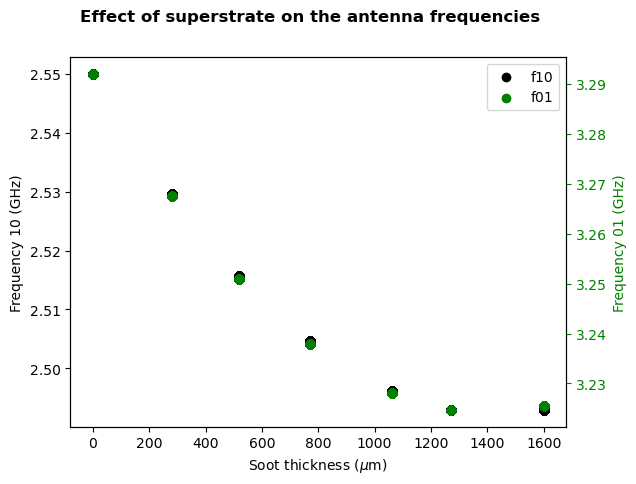

In [6]:
# Visualize the data
fig, ax1 = plt.subplots()
ax1.scatter(x, Y[:, 0], color='k', marker='o', label='f10')
ax1.set_ylabel('Frequency 10 (GHz)', color='k')
ax1.set_xlabel('Soot thickness ($\\mu$m)')
ax1.tick_params('y', colors='k')

ax2 = ax1.twinx()
ax2.scatter(x, Y[:, 1], color='g', marker='o', label='f01')
ax2.set_ylabel('Frequency 01 (GHz)', color='g')
ax2.set_xlabel('Soot thickness ($\\mu$m)')
ax2.tick_params('y', colors='g')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')
fig.suptitle('Effect of superstrate on the antenna frequencies', weight='bold')

In [7]:
# Note: A line won't be a good fit for the data. We need to engineer some features

In [8]:
# FEATURE ENGINEERING AND MODEL SELECTION
degree = 4  # Max polynomial order to be considered
X = np.column_stack([x ** (i + 1) for i in range(degree)])

# Split data into training (60%), cross-validation (20%), and test (20%) sets
X_train, X_, Y_train, Y_ = train_test_split(X, Y, train_size=0.6, random_state=42)
X_cv, X_test, Y_cv, Y_test = train_test_split(X_, Y_, test_size=0.5, random_state=42)

In [9]:
print(X_train.shape)

(21000, 4)


In [10]:
# Function to plot predictions / curve fit
def plot_predictions(x_orig, Y_orig, x_dummy, Y_dummy, polynomial_order):
    """
    Plots the predictions and actual values for given polynomial regression data.

    Arguments:
        x_orig (NumPy array): Original input data
        Y_orig (NumPy array): Actual target values for the original input data.
            Should have two columns representing two different frequency measurements.
        x_dummy (NumPy array): Input data used for generating polynomial predictions.
        Y_dummy (NumPy array): Predicted values from the polynomial regression model.
            Should have two columns corresponding to the predictions for the two frequencies.
        polynomial_order (int): The order of the polynomial used for regression.

    Returns:
        None. The function directly plots the data using Matplotlib.

    """
    fig, ax1 = plt.subplots()

    # Plot actual and predicted values for the first frequency measurement
    ax1.scatter(x_orig, Y_orig[:, 0], color='k', marker='o', label='f10')
    ax1.plot(x_dummy, Y_dummy[:, 0], '-', color='k', label='f10 prediction')
    ax1.set_ylabel('Frequency 10 (GHz)', color='k')
    ax1.set_xlabel('Soot thickness ($\\mu$m)')
    ax1.tick_params('y', colors='k')
    ax1.set_ylim(2.46, 2.58)

    # Create a second y-axis and plot actual and predicted values for the second frequency measurement
    ax2 = ax1.twinx()
    ax2.scatter(x_orig, Y_orig[:, 1], color='g', marker='o', label='f01')
    ax2.plot(x_dummy, Y_dummy[:, 1], '-', color='g', label='f01 prediction')
    ax2.set_ylabel('Frequency 01 (GHz)', color='g')
    ax2.set_xlabel('Soot thickness ($\\mu$m)')
    ax2.tick_params('y', colors='g')

    # Combine legends from both y-axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='best')

    # Set the title of the plot
    fig.suptitle(f'Prediction vs. Target for Polynomial Order #{polynomial_order}')
    plt.show()

Polynomial order: 1, Training cost: 3.033e-05, Cross-validation cost: 3.022e-05


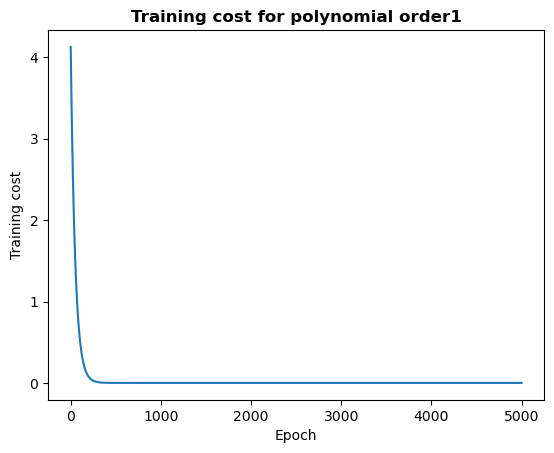

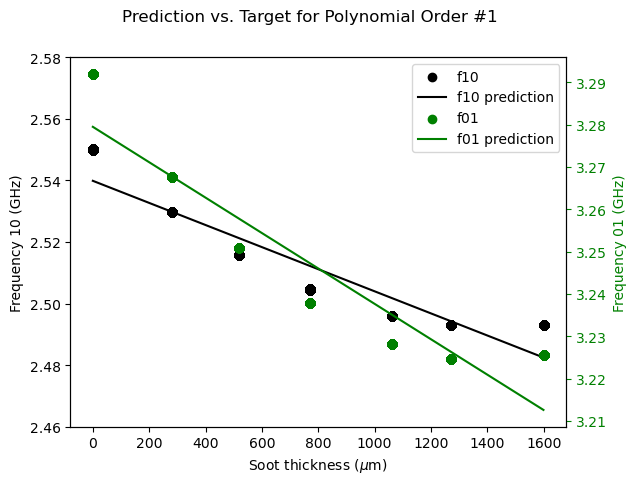

Polynomial order: 2, Training cost: 9.057e-07, Cross-validation cost: 9.019e-07


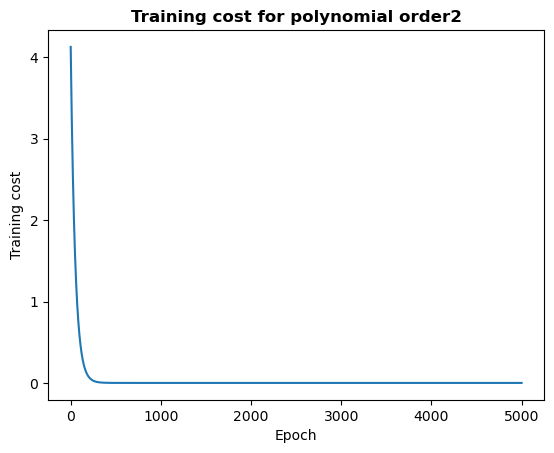

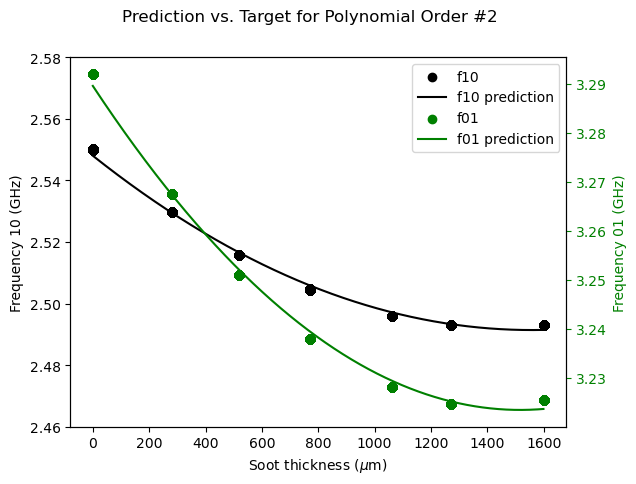

Polynomial order: 3, Training cost: 9.272e-07, Cross-validation cost: 9.400e-07


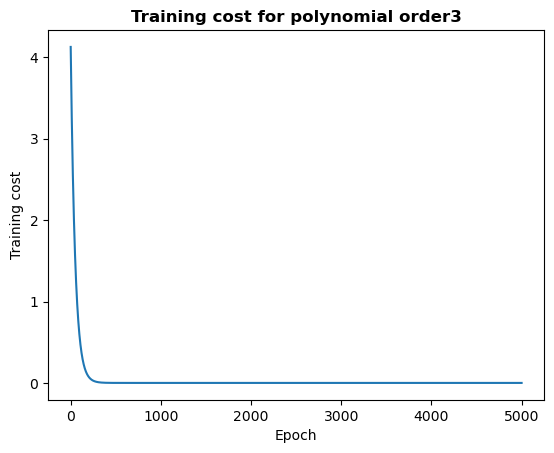

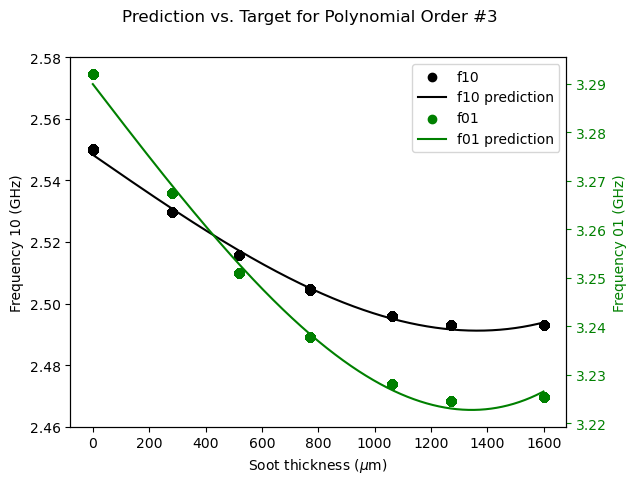

Polynomial order: 4, Training cost: 2.247e-06, Cross-validation cost: 2.280e-06


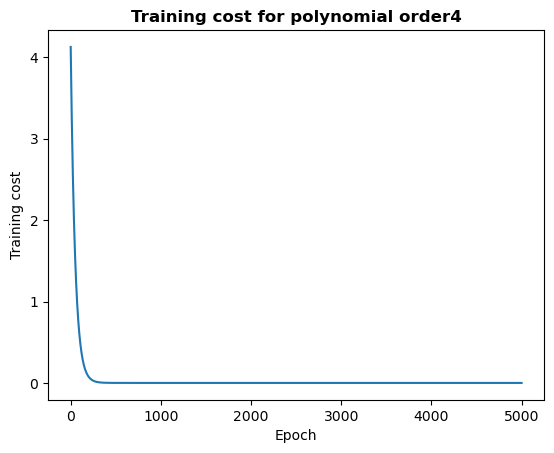

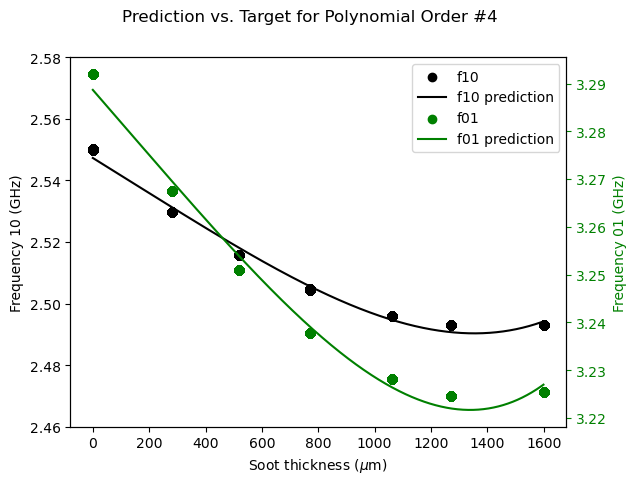

In [11]:
# Find the best polynomial order that best fits the data
Jtrain_hist, Jcv_hist = [], []
mean_history, std_dev_history, W_hist, b_hist = {}, {}, {}, {}

for i in range(degree):
    X_current = X_train[:, :(i + 1)]
    X_train_norm, mean, std_dev = zscore_normalization(X_current)
    X_cv_norm = (X_cv[:, :(i + 1)] - mean) / std_dev
    X_test_norm = (X_test[:, :(i + 1)] - mean) / std_dev

    W0 = np.zeros(Y_train.shape[1]).reshape(-1, 1) if i == 0 else np.zeros((Y_train.shape[1], X_train_norm.shape[1]))
    b0 = np.zeros(Y_train.shape[1])

    W, b, Jtrain, _, _, = run_gradient_descent_multioutput(X_train_norm, Y_train, W0, b0,
                                                           epoch_number=5000,
                                                           alpha=0.01)

    Jcv, _ = compute_cost_multioutput(X_cv_norm, Y_cv, W, b)
    W_hist['W' + str(i + 1)] = W
    b_hist['b' + str(i + 1)] = b
    Jcv_hist.append(Jcv)
    Jtrain_hist.append(Jtrain[-1])

    print(f'Polynomial order: {i + 1}, Training cost: {Jtrain[-1]:.3e}, Cross-validation cost: {Jcv:.3e}')

    # Plot the cost function
    ep = np.arange(len(Jtrain))
    plt.plot(ep, Jtrain)
    plt.ylabel('Training cost')
    plt.xlabel('Epoch')
    plt.title(f'Training cost for polynomial order{i + 1}', weight='bold')
    plt.show()

    poly_x = np.arange(np.min(X_current[:, 0]), np.max(X_current[:, 0]))
    poly_X = np.empty((poly_x.shape[0], X_current.shape[1]))

    for j in range(X_current.shape[1]):
        poly_X[:, j] = (poly_x ** (j + 1)).reshape(-1)

    poly_X_norm = (poly_X - mean) / std_dev
    poly_Y = np.dot(poly_X_norm, W.T) + b.reshape(1, -1)

    # Show fitting
    plot_predictions(x, Y, poly_x, poly_Y, i + 1)

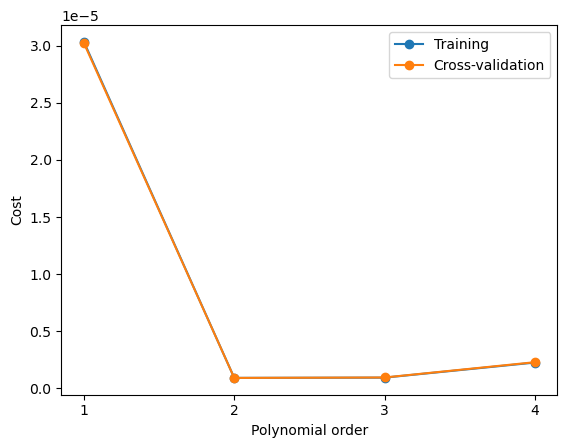

In [12]:
# Visualizing the cost history as a function of the polynomial order
po = np.arange(1, degree + 1)
plt.plot(po, Jtrain_hist, '-o', label='Training')
plt.plot(po, Jcv_hist, '-o', label='Cross-validation')
plt.xticks(np.arange(1, degree + 1))
plt.xlabel('Polynomial order')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [13]:
# Note: The second-order polynomial is suitable for capturing the behavior of the data. 
# FINE TUNING
poly_order = 2
W0 = W_hist['W' + str(poly_order)]
b0 = b_hist['b' + str(poly_order)]
X_current = X_train[:, :poly_order]
X_train_norm, mean, std_dev = zscore_normalization(X_current)
X_cv_norm = (X_cv[:, :poly_order] - mean) / std_dev
X_test_norm = (X_test[:, :poly_order] - mean) / std_dev

In [14]:
W, b, Jtrain, J_cv, _, _ = run_gradient_descent_multioutput_with_cv(X_train_norm, Y_train, X_cv_norm, Y_cv, W0, b0,
                                                                    alpha=0.01, epoch_number=10000, lambda_=0)

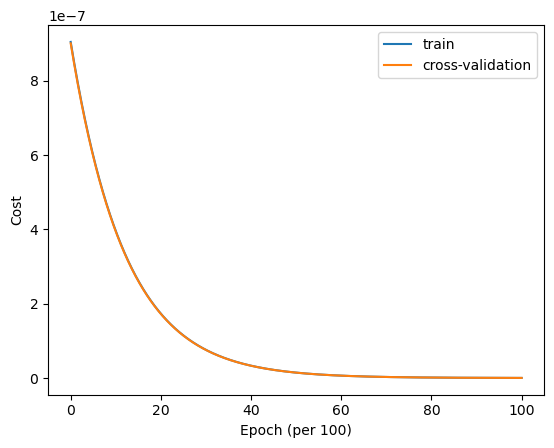

In [15]:
# Compare training and validation losses
plt_cost_functions(np.array(Jtrain), np.array(J_cv))

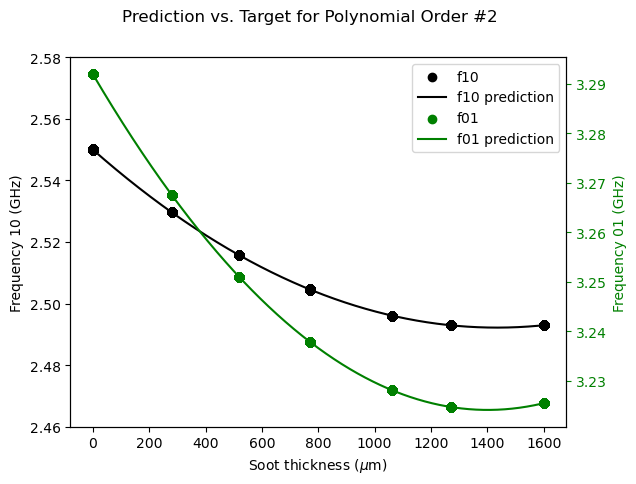

In [16]:
# Check the new curve fit
poly_x = np.arange(np.min(X_current[:, 0]), np.max(X_current[:, 0]))
poly_X = np.empty((poly_x.shape[0], X_current.shape[1]))

for j in range(X_current.shape[1]):
    poly_X[:, j] = (poly_x ** (j + 1)).reshape(-1)

poly_X_norm = (poly_X - mean) / std_dev
poly_Y = np.dot(poly_X_norm, W.T) + b.reshape(1, -1)
plot_predictions(x, Y, poly_x, poly_Y, poly_order)

In [17]:
Jtest, _ = compute_cost_multioutput(X_test_norm, Y_test, W, b)

In [18]:
print('Training cost: %e, Cross-validation cost: %e, Test cost: %e' % (Jtrain[-1], J_cv[-1], Jtest))
print(f'Revised model score: {r2_score(Y_test, np.dot(X_test_norm, W.T) + b.reshape(1, -1))}')
print(f'W: \n{W}')
print(f'b: \n{b}')

Training cost: 2.367240e-10, Cross-validation cost: 2.343800e-10, Test cost: 2.377160e-10
Revised model score: 0.9999990089566968
W: 
[[-0.042082  0.02436 ]
 [-0.050562  0.029954]]
b: 
[2.511604 3.24657 ]
